In [1]:
from PIL import Image
import os
import PIL
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.ndimage as ndimage
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.stats import multivariate_normal

# Some mean and covariance matrix (random sample)

In [2]:
m1 = np.array([137.52923748635584, 84.341131957786217, 78.770778106970212])
cov1 = np.array([[ 723.05062757,  677.25175499,  655.1176708 ],
       [ 677.25175499,  660.38979244,  643.14910085],
       [ 655.1176708 ,  643.14910085,  640.02131679]])

m2 = np.array([118.41996558993118, 147.10866296732593, 123.63691177382354])
cov2 = np.array([[ 1463.7264814 ,  1455.4160082 ,  1458.66421291],
       [ 1455.4160082 ,  1452.36768879,  1453.54715988],
       [ 1458.66421291,  1453.54715988,  1455.55414233]])

m3 = np.array([90.595208045488363, 94.424839249654582, 98.290499787437554])
cov3 = np.array([[ 1435.54436528,  1448.82313544,  1449.18143498],
       [ 1448.82313544,  1469.37034307,  1468.21597487],
       [ 1449.18143498,  1468.21597487,  1470.86624136]])

m4 = np.array([141.43016272189348, 133.243550295858, 128.4221597633136])
cov4 = np.array([[ 151.97751887,  147.18815073,  136.49469691],
       [ 147.18815073,  152.01204438,  142.8658939 ],
       [ 136.49469691,  142.8658939 ,  140.63687931]])

m5 = np.array([54.35281033901164, 77.229001517962558, 88.713642688480348])
cov5 = np.array([[ 106.70561537,  113.34657926,  131.36540161],
       [ 113.34657926,  130.57528405,  155.08146302],
       [ 131.36540161,  155.08146302,  202.94517466]])

cov_list = [cov1, cov2, cov3, cov4, cov5]
mean_list = [m1, m2, m3, m4, m5]

In [3]:
def generate_img(i,mean_dist, c_matrix, unit):
    mn = multivariate_normal(mean=mean_dist[i], cov=c_matrix[i])
    # generate image
    random_g = mn.rvs(size=unit*unit)
    x0 = np.reshape(random_g.T[0],(unit,unit))
    x1 = np.reshape(random_g.T[1],(unit,unit))
    x2 = np.reshape(random_g.T[2],(unit,unit))
    im = np.array([x0,x1,x2]).T.astype(np.uint8)
    # create border
    row, col= im.shape[:2]
    bottom= im[row-2:row, 0:col]
    mean= cv2.mean(bottom)[0]
    bordersize=2
    border=cv2.copyMakeBorder(im, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv2.BORDER_CONSTANT, value=[0,0,0] )
    return border

In [4]:
height = 5
length = 10
units = 100
#creates a new empty image, RGB mode, and size 400 by 400.
new_im = Image.new('RGB', (length*units+int(units/2),height*units))
k = 1
for i in range(0, length*units, units):
    
    for j in range(0, height*units, units):
        im = Image.fromarray(generate_img(np.random.randint(0,5,1)[0],
                                          mean_list,cov_list, units), 'RGB') # random generate image
        im.thumbnail((units,units))
        # paste the image at location i,j
        new_im.paste(im, (i+(int(j/units)%2)*int(units/2),j))
        
    else:
        continue  # executed if inner loop ended normally (no break)
    
    break  # executed if 'continue' was skipped (break occurred)

img = np.array(new_im)[:,int(units/2):-int(units/2),:]
im = Image.fromarray(img, 'RGB')

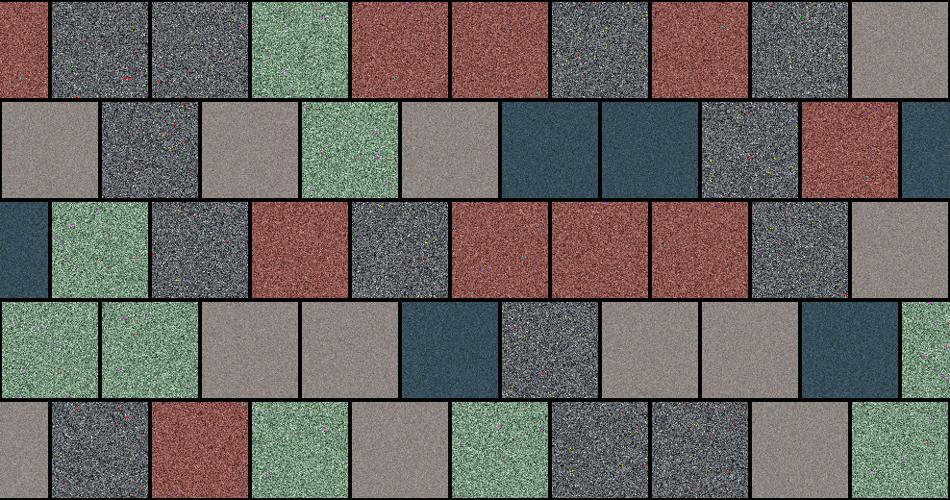

In [5]:
im